In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os


**Loading the data**

In [2]:
df = pd.read_csv('Survey.csv')

In [3]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [6]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

1.1. For this data, construct the following contingency tables (Keep Gender as row variable)


1.1.1. Gender and Major


In [7]:
print("1.1.1 - Below is the output of Contingency Tables For Gender and Major")
df_crosstab = pd.crosstab(df['Gender'],df['Major'],margins = False)
print(df_crosstab)

1.1.1 - Below is the output of Contingency Tables For Gender and Major
Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


1.1.2. Gender and Grad Intention


In [8]:
print("1.1.1 - Below is the output of Contingency Tables For Gender and Grad Intention")
df_crosstab = pd.crosstab(df['Gender'],df['Grad Intention'],margins = False)
print(df_crosstab)

1.1.1 - Below is the output of Contingency Tables For Gender and Grad Intention
Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


1.1.3. Gender and Employment


In [9]:
print("1.1.1 - Below is the output of Contingency Tables For Gender and Employment")
df_crosstab = pd.crosstab(df['Gender'],df['Employment'],margins = False)
print(df_crosstab)

1.1.1 - Below is the output of Contingency Tables For Gender and Employment
Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


1.1.4. Gender and Computer

In [10]:
print("1.1.1 - Below is the output of Contingency Tables For Gender and Computer")
df_crosstab = pd.crosstab(df['Gender'],df['Computer'],margins = False)
print(df_crosstab)

1.1.1 - Below is the output of Contingency Tables For Gender and Computer
Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


1.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

1.2.1. What is the probability that a randomly selected CMSU student will be male?

In [11]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [12]:
Female=33
Male= 29
Total= Male+Female

In [13]:
print("1.2.1 - Probability that a randomly selected CMSU student will be male", Male/Total)


1.2.1 - Probability that a randomly selected CMSU student will be male 0.46774193548387094


1.2.2. What is the probability that a randomly selected CMSU student will be female?

In [14]:
print("1.2.2 - Probability that a randomly selected CMSU student will be Female", Female/Total)

1.2.2 - Probability that a randomly selected CMSU student will be Female 0.532258064516129


1.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

1.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [15]:
###Using contingency tables of Gender and Majors we got the total numbers of males an female students
pd.crosstab(index=df['Gender'], columns=df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [16]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [17]:
print(" Solution to 1.3.1 - Below is the conditional probability of different majors")
Male=29 #Total number of male
print("Probability of Males opting for Accounting",4/Male*100) #Total number major t print("Probability of Males opting for CIS",1/Male*100)
print("Probability of Males opting for Economics/Finance",4/Male*100)
print("Probability of Males opting for CIS",1/Male*100)
print("Probability of Males opting for International Business",2/Male*100)
print("Probability of Males opting for Management",6/Male*100)
print("Probability of Males opting for Other",4/Male*100)
print("Probability of Males opting for Retailing/Marketing",5/Male*100)
print("Probability of Males opting for Undecided",3/Male*100)

 Solution to 1.3.1 - Below is the conditional probability of different majors
Probability of Males opting for Accounting 13.793103448275861
Probability of Males opting for Economics/Finance 13.793103448275861
Probability of Males opting for CIS 3.4482758620689653
Probability of Males opting for International Business 6.896551724137931
Probability of Males opting for Management 20.689655172413794
Probability of Males opting for Other 13.793103448275861
Probability of Males opting for Retailing/Marketing 17.24137931034483
Probability of Males opting for Undecided 10.344827586206897


1.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [18]:
print(" Solution to 1.3.2 - Below is the conditional probability of different majors")
Female=33 #Total number of female
print("Probability of females opting for Accounting",3/Female*100) #Total number major t print("Probability of Males opting for CIS",1/Male*100)
print("Probability of Females opting for Economics/Finance",7/Female*100)
print("Probability of Males opting for CIS",3/Female*100)
print("Probability of Females opting for International Business",4/Female*100)
print("Probability of Females opting for Management",4/Female*100)
print("Probability of FEmales opting for Other",3/Female*100)
print("Probability of Females opting for Retailing/Marketing",9/Female*100)

 Solution to 1.3.2 - Below is the conditional probability of different majors
Probability of females opting for Accounting 9.090909090909092
Probability of Females opting for Economics/Finance 21.21212121212121
Probability of Males opting for CIS 9.090909090909092
Probability of Females opting for International Business 12.121212121212121
Probability of Females opting for Management 12.121212121212121
Probability of FEmales opting for Other 9.090909090909092
Probability of Females opting for Retailing/Marketing 27.27272727272727


1.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

1.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [19]:
#2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
#Using the Contingency table to Gender and Grad Intention We will get the total number of students.
print("Below is the output of Contingency Tables For Gender and Grad Intention")
pd.crosstab(index=df['Gender'], columns=df['Grad Intention'])


Below is the output of Contingency Tables For Gender and Grad Intention


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [20]:
# Solution = Intended Male = Decided male/Totalmale
Total_Male = 3+9+17 #sum of No, Undecided & Yes.
Decided_Male = 17
print("The probability That a randomly chosen student is a male and intends to graduate",Decided_Male/Total_Male*100)

The probability That a randomly chosen student is a male and intends to graduate 58.620689655172406


1.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [21]:
## 2.4.2 Find the probability that a randomly selected student is a female and does not have a laptop
## Using the Contingency table to Gender and Computer We will get the total number laptop, desktop and tablet each student have.
print("Below is the output of Contingency Tables For Gender and Computer")
pd.crosstab(index=df['Gender'], columns=df['Computer'])

Below is the output of Contingency Tables For Gender and Computer


Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [22]:
## Solution = Female without laptop = Laptop/Totalfemale*100
Total_Female=2+29+2 ## Sum of desktop, laptop, tablet female users.
No_Laptop_Female=2+2 ## Sum of Desktop, Tablet
print("The probability that a randomly selected student is a female and does not have a laptop"
,No_Laptop_Female/Total_Female*100)


The probability that a randomly selected student is a female and does not have a laptop 12.121212121212121


1.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

1.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [23]:
 # Using the Contingency table to Gender and Employment We will get the total numbers with employment status
pd.crosstab(index=df['Gender'], columns=df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [24]:
#solution: Total_male_student+Total_full_time_student - male_full_time_student/total student
Total_male_student = 29
Total_fulltime_student = 10 #Full time Female & Male
Male_fulltime_student = 7
Total_student = 62 ## Sum of all type of employment and gender
print("The probability that a randomly chosen student is a male or has a full time employment",Total_male_student+
      Total_fulltime_student-Male_fulltime_student/Total_student*100)


The probability that a randomly chosen student is a male or has a full time employment 27.70967741935484


1.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [25]:
#Using the Contingency table to Gender and Major we will get each student with respective majors.
pd.crosstab(index=df['Gender'], columns=df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [26]:
# Solution: (Female_International_Business+ Female_Management) / (Total_Female_stud
Female_International_Business=4
Female_Management=4
Total_Female_student=33 ## Female is 33 which is sume of all Majors
print("The conditional probability that given a female student is randomly chosen, she is majoring in International business or Management",Female_International_Business + Female_Management/Total_Female_student*100)


The conditional probability that given a female student is randomly chosen, she is majoring in International business or Management 16.12121212121212


1.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [27]:
pd.crosstab(index=df['Gender'], columns=df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [ ]:
#S(Solved over Excel - As below;
#The Probablity that a radomly selected student'being female'
#The probablity that a radomly selected student the graduate intention and being fem
#P(Grad Intention Yes) = 28/40*100 = 70
#P(Grad Intention Yes|Female) = 11/20*100 =55
#The Probablity are not equal. This suggests that the two events are independent.

1.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

1.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [28]:
#Using contingency tables of Gender and GPA we will get the total numbers of students and GPA numbers
pd.crosstab(index=df['Gender'], columns=df['GPA'])


GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [29]:
# Solution - Total number of student are P(T) = 62
             #Total number of the students having GPA less than 3 are P(G<3) =17
             #(Student_less_than_3)/(Total_Student)*100
Male=29 #sum of Total male in the data set - Gendar
Female=33 #sun of total female in the data set - Gendar
Total_Student=Male+Female #sum of Total males & Females
Male_less_then_3_GPA= 9 #Sum of males less then 3 GPA
Female_less_3_GPA=8 #Sum of females less then 3 GPA
Total_Student_Less_then_3GPA = Male_less_then_3_GPA+Female_less_3_GPA
print("The Probablity that GPA of the student is less than 3 are", Total_Student_Less_then_3GPA/Total_Student*100)

The Probablity that GPA of the student is less than 3 are 27.419354838709676


Observation - Using contingency tables of Gender and GPA we got the total numbers of students and number of students GPA less than 3 and post calculation we fond out that - Probability that student is chosen randomly and that his/her GPA is less than 3 is 27.41%

1.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [30]:
pd.crosstab(index=df['Gender'], columns=df['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [31]:
Number_male_salary_more_than_equal_to_50 = 14
Total_number_of_Male_students = 29
print("Probablity that randomly selected male earns 50 or more:", Number_male_salary_more_than_equal_to_50/Total_number_of_Male_students*100)

Probablity that randomly selected male earns 50 or more: 48.275862068965516


1.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

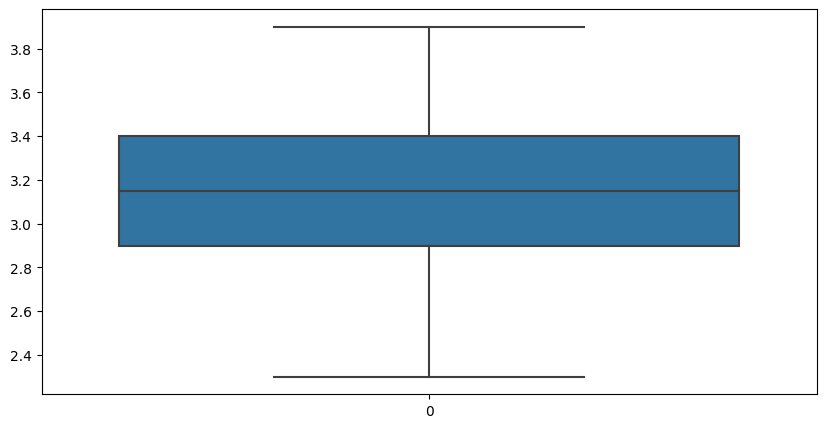

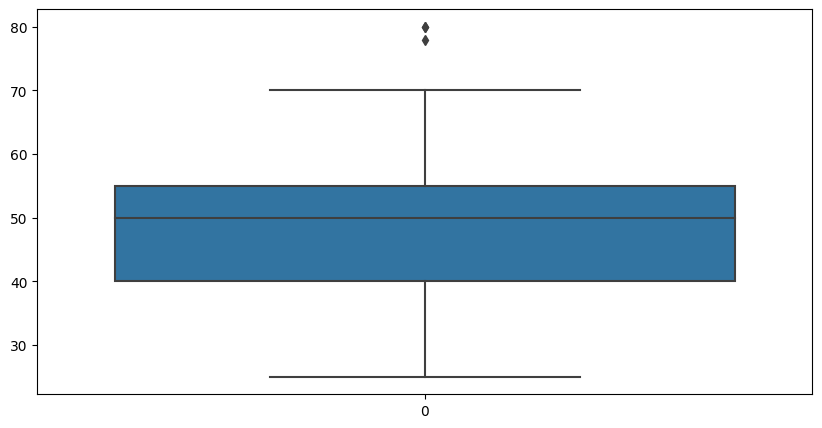

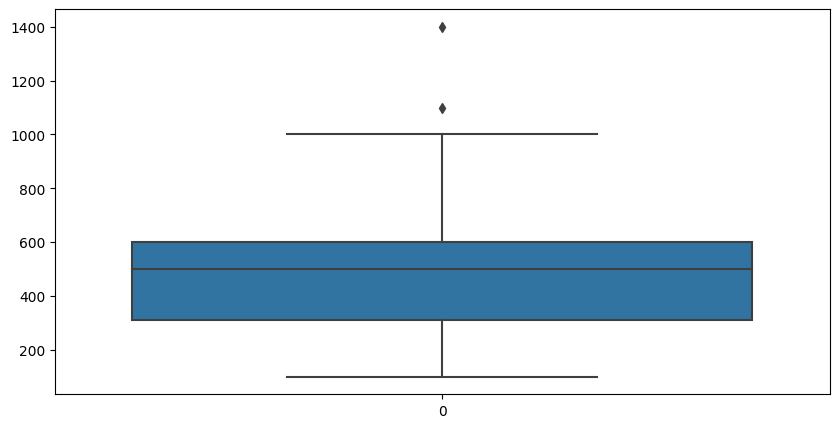

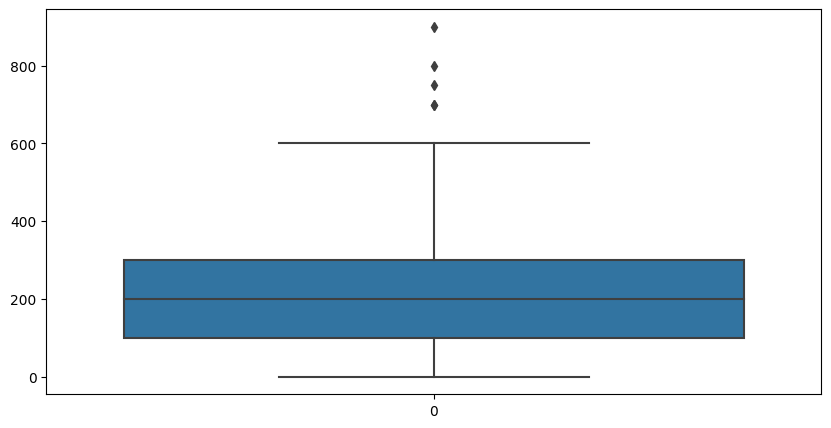

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(df['GPA'])
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(df['Salary'])
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(df['Spending'])
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(df['Text Messages'])
plt.show()

In [40]:
#WIll perform a shapiro test to establish distribution
from scipy import stats
import scipy as scipy

In [41]:
stats.shapiro(df['GPA'])

ShapiroResult(statistic=0.9685359597206116, pvalue=0.11203724890947342)

In [42]:
stats.shapiro(df['Salary'])

ShapiroResult(statistic=0.9565865993499756, pvalue=0.028003966435790062)

In [43]:
stats.shapiro(df['Spending'])

ShapiroResult(statistic=0.877745509147644, pvalue=1.685508141235914e-05)

In [44]:
stats.shapiro(df['Text Messages'])

ShapiroResult(statistic=0.8594194650650024, pvalue=4.324156179791316e-06)

Observation : By these details we confirm that out of the given four data sets ‘GPA’ and ‘Salary’ are normally distributed & ‘Spending’ and ‘Text Messages’ are not.